In [1]:
import json
import csv
import tweepy
import re
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
import GetOldTweets3 as got
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap
import plotly_express as px

In [2]:
# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

In [3]:
df=pd.read_csv('final_pesu.csv')
wn = nltk.WordNetLemmatizer()
df=df.drop(columns="Unnamed: 0")
df

,text,username,tweet_id,timestamp,hashtags,screen_name,retweets,uni_handle,compound,Sentiment
0,Transforming footpaths: The architecture depar...,PES University,1137730835044392960,2019-06-09 14:39:03,[],PESUniversity,2,1.0,0.5106,Positive
1,MBA OPEN HOUSE on June 9 @ 9.30 am. You and yo...,PES University,1137231356377780224,2019-06-08 05:34:18,[],PESUniversity,0,1.0,0.4215,Positive
2,Transforming footpaths: The architecture depar...,PES University,1137730835044392960,2019-06-09 14:39:03,[],PESUniversity,2,1.0,0.5106,Positive
3,MBA OPEN HOUSE on June 9 @ 9.30 am. You and yo...,PES University,1137231356377780224,2019-06-08 05:34:18,[],PESUniversity,0,1.0,0.4215,Positive
4,Talk to us for instant updates on direct admis...,universitiesbangalore.com,1139797459436261376,2019-06-15 07:31:05,"['Direct_Admission_PES_University', 'PES_Unive...",universitiesba1,0,0.0,0.0000,Neutral
5,Y is the service Road from PES university in 1...,Abhilash BP,1139483889603248128,2019-06-14 10:45:04,[],bp_abhilash,0,0.0,0.3612,Positive
6,Two Day FDP on DESIGN FOR TEST using MENTOR TE...,CoreEL Technologies,1139429982025814016,2019-06-14 07:10:51,[],CoreEL_Techno,1,0.0,0.0000,Neutral
7,@AddlCPTraffic @blrcitytraffic service rd nea...,Shreedhar Kulkarni,1139072421917384704,2019-06-13 07:30:02,[],ShreedharKulka7,0,0.0,-0.3753,Negative
8,PES University is calling applications for the...,Lawctopus,1139044540780670976,2019-06-13 05:39:15,[],Lawctopus,0,0.0,0.0000,Neutral
9,Talk to us for instant updates on direct admis...,universitiesbangalore.com,1139797459436261376,2019-06-15 07:31:05,"['Direct_Admission_PES_University', 'PES_Unive...",universitiesba1,0,0.0,0.0000,Neutral


In [4]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 345
Data columns (total 10 columns):
text           185 non-null object
username       185 non-null object
tweet_id       185 non-null int64
timestamp      185 non-null object
hashtags       185 non-null object
screen_name    185 non-null object
retweets       185 non-null int64
uni_handle     185 non-null float64
compound       185 non-null float64
Sentiment      185 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 15.9+ KB


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format = "%d/%m/%Y", utc  = False)

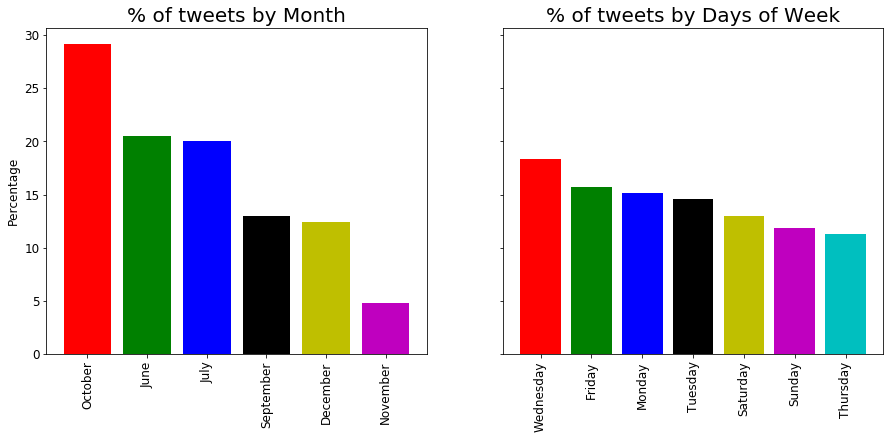

In [6]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df["monthName"] = df.timestamp.dt.month_name()
data = df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of tweets by Month')

df["dayName"] = df.timestamp.dt.day_name()
data = df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of tweets by Days of Week')

plt.show()

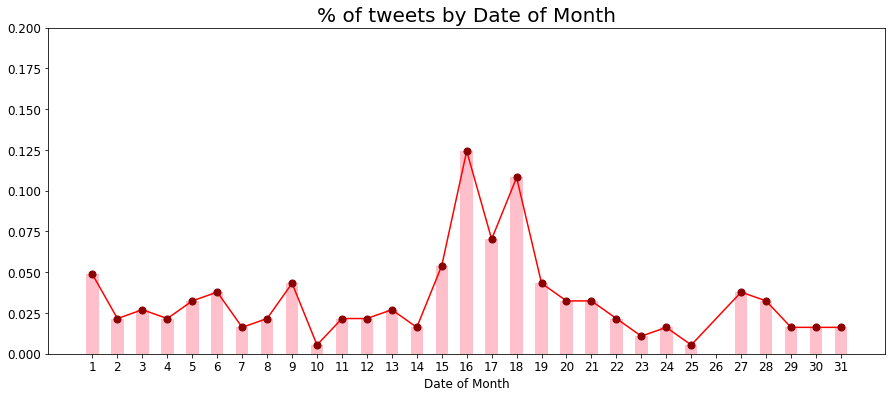

In [7]:
fig, axes = plt.subplots(figsize=(15,6))
df["dayOfMonth"] = df.timestamp.dt.day
data = df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.2)
axes.set_title('% of tweets by Date of Month')

plt.show()

In [8]:
import string
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text_rc) #remove urls
    nopunc = re.sub(r'http\S+', '', nopunc) #remove usernames
    nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc) #remove hashtags
    nopunc= re.sub(r'(.)\1+', r'\1\1', nopunc)  #remove repeating characters 
    tokens = re.split('\W+', nopunc)    # tokenization
    text = [word for word in tokens if word not in stopwords]  # remove stopwords and stemming
    return text
df['Text_cleaned'] = df['text'].apply(lambda x: clean_text(x))

In [9]:
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
df['Text_lemmatized'] = df['Text_cleaned'].apply(lambda x: lemmatizer(x))

def listtostr(s):
    str1=" "
    return (str1.join(s))
df['Text_lemmatized_str'] = df['Text_lemmatized'].apply(lambda x: listtostr(x))
df.head()

,text,username,tweet_id,timestamp,hashtags,screen_name,retweets,uni_handle,compound,Sentiment,monthName,dayName,dayOfMonth,Text_cleaned,Text_lemmatized,Text_lemmatized_str
0,Transforming footpaths: The architecture depar...,PES University,1137730835044392960,2019-06-09 14:39:03,[],PESUniversity,2,1.0,0.5106,Positive,June,Sunday,9,"[transforming, footpaths, architecture, depart...","[transforming, footpath, architecture, departm...",transforming footpath architecture department ...
1,MBA OPEN HOUSE on June 9 @ 9.30 am. You and yo...,PES University,1137231356377780224,2019-06-08 05:34:18,[],PESUniversity,0,1.0,0.4215,Positive,June,Saturday,8,"[mba, open, house, june, family, invited, spen...","[mba, open, house, june, family, invited, spen...",mba open house june family invited spend day p...
4,Talk to us for instant updates on direct admis...,universitiesbangalore.com,1139797459436261376,2019-06-15 07:31:05,"['Direct_Admission_PES_University', 'PES_Unive...",universitiesba1,0,0.0,0.0000,Neutral,June,Saturday,15,"[talk, us, instant, updates, direct, admission...","[talk, u, instant, update, direct, admission, ...",talk u instant update direct admission directa...
5,Y is the service Road from PES university in 1...,Abhilash BP,1139483889603248128,2019-06-14 10:45:04,[],bp_abhilash,0,0.0,0.3612,Positive,June,Friday,14,"[service, road, pes, university, ft, ring, roa...","[service, road, pe, university, ft, ring, road...",service road pe university ft ring road used t...
6,Two Day FDP on DESIGN FOR TEST using MENTOR TE...,CoreEL Technologies,1139429982025814016,2019-06-14 07:10:51,[],CoreEL_Techno,1,0.0,0.0000,Neutral,June,Friday,14,"[two, day, fdp, design, test, using, mentor, t...","[two, day, fdp, design, test, using, mentor, t...",two day fdp design test using mentor tessent t...


In [19]:
pos_df = df[df.Sentiment == 'Positive']
neg_df = df[df.Sentiment == 'Negative']
neu_df = df[df.Sentiment == 'Neutral']

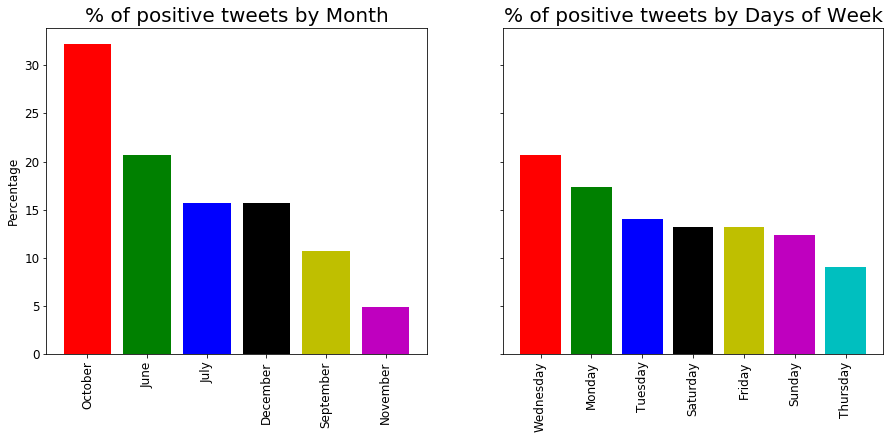

In [20]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = pos_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of positive tweets by Month')

data = pos_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of positive tweets by Days of Week')

plt.show()

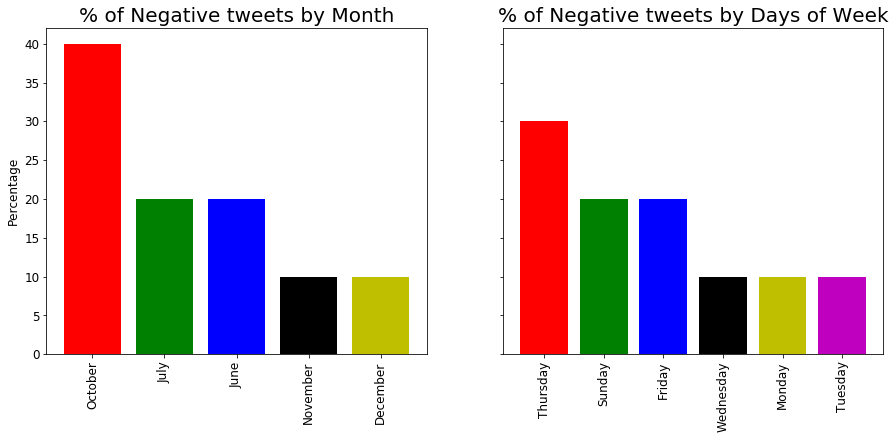

In [21]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = neg_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Negative tweets by Month')

data = neg_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of Negative tweets by Days of Week')

plt.show()

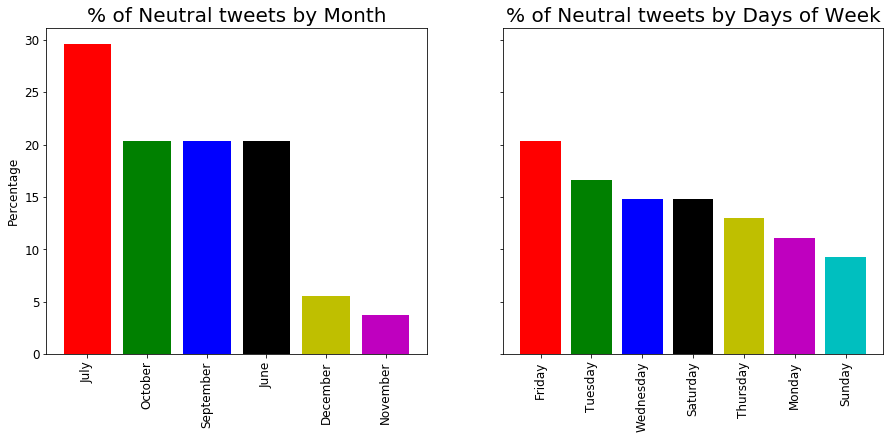

In [22]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = neu_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Neutral tweets by Month')

data = neu_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of Neutral tweets by Days of Week')

plt.show()

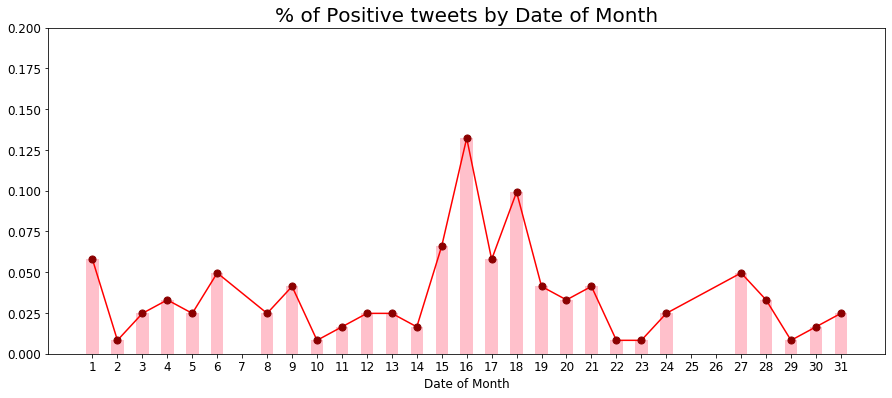

In [23]:
fig, axes = plt.subplots(figsize=(15,6))
data = pos_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.2)
axes.set_title('% of Positive tweets by Date of Month')

plt.show()

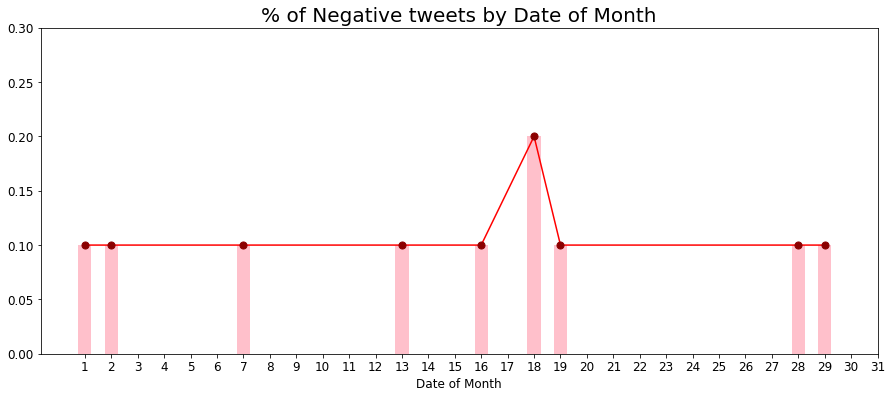

In [25]:
fig, axes = plt.subplots(figsize=(15,6))
data = neg_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.3)
axes.set_title('% of Negative tweets by Date of Month')

plt.show()

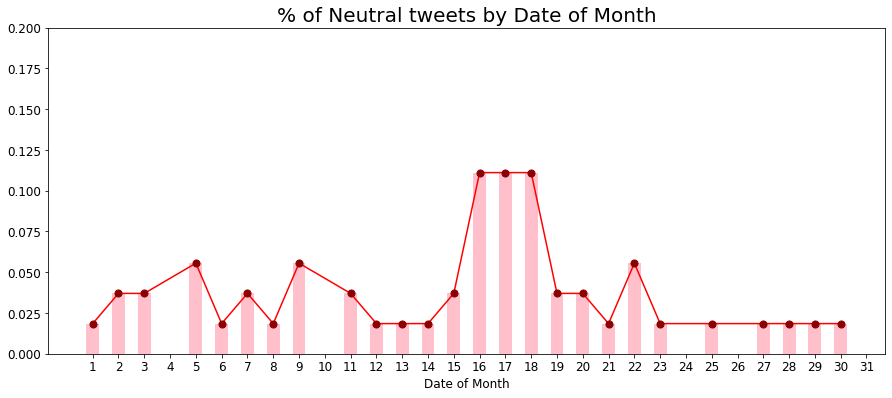

In [26]:
fig, axes = plt.subplots(figsize=(15,6))
data = neu_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.2)
axes.set_title('% of Neutral tweets by Date of Month')

plt.show()

In [10]:
wordfreq = {}
for sentence in df['Text_lemmatized_str']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [11]:
import operator
sorted_wordfreq=sorted(wordfreq.items(),key=operator.itemgetter(1),reverse=True)
sorted_wordfreq

[('university', 108),
 ('pe', 106),
 ('pesuniversity', 52),
 ('student', 45),
 ('program', 23),
 ('year', 23),
 ('law', 18),
 ('campus', 15),
 ('day', 15),
 ('open', 14),
 ('opportunity', 14),
 ('admission', 14),
 ('bangalore', 14),
 ('bengaluru', 14),
 ('new', 14),
 ('th', 14),
 ('road', 13),
 ('llb', 13),
 ('session', 13),
 ('application', 12),
 ('college', 12),
 ('team', 12),
 ('today', 11),
 ('work', 11),
 ('dr', 10),
 ('u', 10),
 ('traffic', 10),
 ('google', 10),
 ('held', 10),
 ('education', 10),
 ('pesu', 10),
 ('india', 10),
 ('mba', 9),
 ('house', 9),
 ('faculty', 9),
 ('member', 9),
 ('integrated', 9),
 ('get', 9),
 ('pessat', 9),
 ('r', 9),
 ('sir', 9),
 ('time', 9),
 ('family', 8),
 ('apply', 8),
 ('city', 8),
 ('award', 8),
 ('learning', 8),
 ('first', 8),
 ('congratulation', 8),
 ('indian', 8),
 ('june', 7),
 ('talk', 7),
 ('rd', 7),
 ('bba', 7),
 ('click', 7),
 ('annual', 7),
 ('top', 7),
 ('part', 7),
 ('know', 7),
 ('contest', 7),
 ('winner', 7),
 ('best', 7),
 ('take'

In [16]:
df['hashtags'].str.replace('[\[,\]]', '')


0                                                       
1                                                       
4      'Direct_Admission_PES_University' 'PES_Univers...
5                                                       
6                                                       
7                                                       
8                                                       
14                                                      
16                                                      
18                                       'internshippic'
19                                                      
20                                                      
21                                                      
22                                                      
28                                                      
30                                                      
31                                                      
32         'TheAdmissionMentor'

In [17]:
hashtagfreq = {}
for sentence in df['hashtags']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in hashtagfreq.keys():
            hashtagfreq[token] = 1
        else:
            hashtagfreq[token] +=1

In [18]:
sorted_hashtag=sorted(hashtagfreq.items(),key=operator.itemgetter(1),reverse=True)
sorted_hashtag

[('[', 185),
 (']', 185),
 ("'", 133),
 (',', 63),
 ("'PESUniversity", 9),
 ("'PES_University_Direct_Admission", 3),
 ("'PESSAT", 3),
 ("'education", 3),
 ("'LearningForLifepic", 3),
 ("'RT", 3),
 ("'educationpic", 3),
 ("'Management_Quota_Admission_PES_University", 2),
 ("'dscpesu", 2),
 ("'google", 2),
 ("'pesuniversity", 2),
 ("'IntelIndiapic", 2),
 ("'PESU", 2),
 ("'PES", 2),
 ("'hackathon", 2),
 ("'Bengaluru", 2),
 ("'038", 2),
 ("'Direct_Admission_PES_University", 1),
 ("'internshippic", 1),
 ("'TheAdmissionMentor", 1),
 ("'DirectAdmission2019pic", 1),
 ("'Self4Society", 1),
 ("'googlecloudpic", 1),
 ("'dsc", 1),
 ("'cloud", 1),
 ("'gdg", 1),
 ("'googledevelopers", 1),
 ("'india", 1),
 ("'bangalorepic", 1),
 ("'AIforall", 1),
 ("'IntelIndia", 1),
 ("'ETCampusStars", 1),
 ("'sigmaxing", 1),
 ("'Skal", 1),
 ("'University", 1),
 ("'Assistant", 1),
 ("'Associate", 1),
 ("'Professors", 1),
 ("'Jobs", 1),
 ("'CareersPages_College", 1),
 ("'PESIUP", 1),
 ("'GlobalMBApic", 1),
 ("'crioni

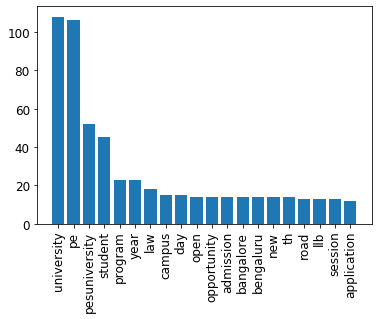

In [37]:
most_freqword = sorted_wordfreq[0:20]
plt.bar(range(len(most_freqword)), [val[1] for val in most_freqword], align='center')
plt.xticks(range(len(most_freqword)), [val[0] for val in most_freqword])
plt.xticks(rotation=90)
plt.show()

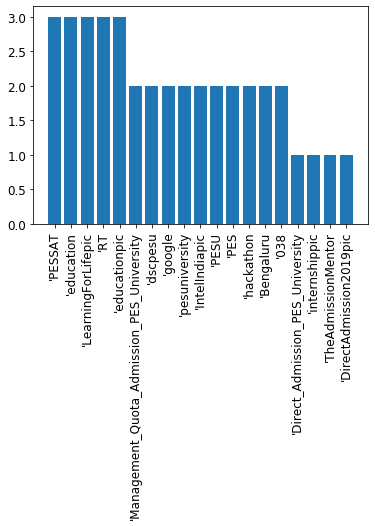

In [36]:
most_freqht = sorted_hashtag[6:25]
plt.bar(range(len(most_freqht)), [val[1] for val in most_freqht], align='center')
plt.xticks(range(len(most_freqht)), [val[0] for val in most_freqht])
plt.xticks(rotation=90)
plt.show()